  
 ....reading fort.64 (LW)
       nlat= 64 nlon= 128 nlev= 30
       END OF FILE: DONE
(8192, 3)
LW (128, 64)
  
 ....reading fort.65 (SW)
       nlat= 64 nlon= 128 nlev= 30
       END OF FILE: DONE
(8192, 3)
SW (128, 64)
  
 ....reading fort.66 (Total)
       nlat= 64 nlon= 128 nlev= 30
       END OF FILE: DONE
(8192, 3)
tot (128, 64)
******************************
Total Integrated Output (W):
  LW: 2.4000224484303005e+17
  SW: 4.21602938592334e+16
 sum: 2.8216253870226346e+17
  Net: 66766736329737.47 -177778.53721461
-------------------------------
 Dayside Integrated Output (W):
  LW: 1.1739183406681552e+17
  SW: 2.0734953767791372e+16
 sum: 1.381267878346069e+17
******************************


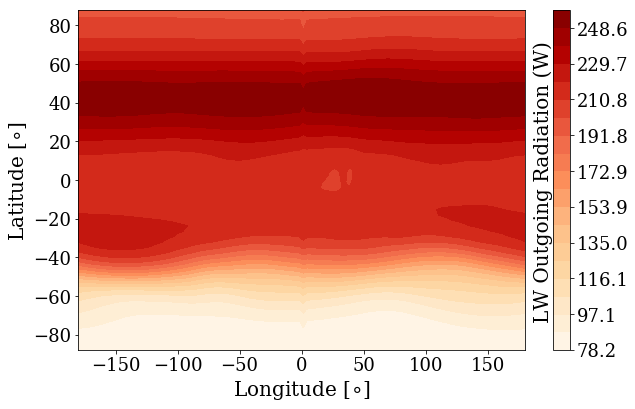

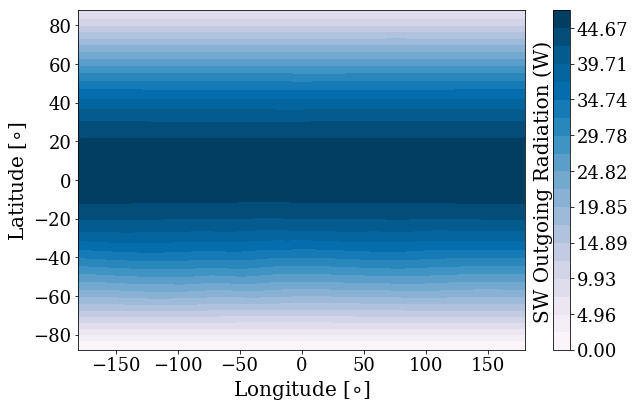

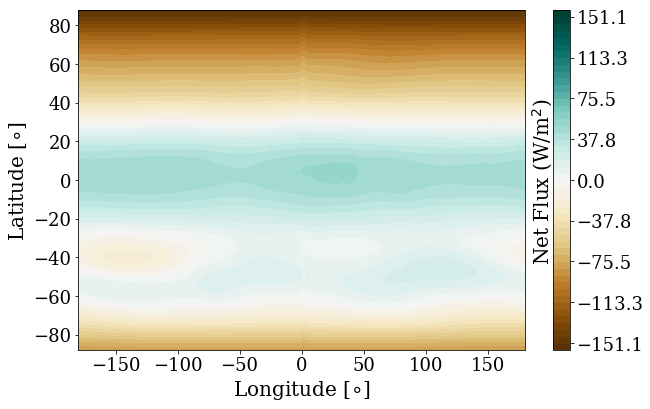

******************************
Total Integrated Input - ACTUAL (W):
  SW: 2.8222930543859318e+17
 O/I: 99.98 %
******************************


In [1]:
import numpy as np

from igcm_olr_func import igcm_olr
%matplotlib inline

oom=0
p0=1.0
radea=1.5*6.37*10**6
base_flux=0.087#0.4

#path='/Users/ermay/Desktop/GCM_plots/Files/'
path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'
#runname='CBinary/'
#runname='FiducialPlanet/Model4/L10/T42/P0_001'
#runname='FiducialPlanet/PostSurf/RESTART/'#VarTdiss/td_005'#Model4/Test_New/'#/L10/T42/P0_050'
runname='EARTH_T42_o/'
#runname='Hayley/Slow/'
makeplot=True
saveplot=True
LastOrb=False
savenamelw=path+runname+'/F_outgoing_lw.png'
savenamesw=path+runname+'/F_outgoing_sw.png'
savenameto=path+runname+'/F_net.png'
both=True #true to plot SW and LW, False for only lW
total=True

data_lw,data_sw,data_net,total_lw,total_sw,total_net,lon_arr,lat_arr=igcm_olr(path,runname,oom,p0,radea,makeplot, saveplot,savenamelw,savenamesw,savenameto,both,total,LastOrb)


import pickle
pickle.dump(total_lw, open(path+runname+'/LW_total.txt', 'wb'))
pickle.dump(total_sw, open(path+runname+'/SW_total.txt', 'wb'))

# # read object from file
# a = pickle.load(open(path+runname+'/LW_total.txt', 'rb'))
# b = pickle.load(open(path+runname+'/SW_total.txt', 'rb'))

#total_net=incoming-outsw+incomlw-outlw
incoming_actual=total_net+total_sw+total_lw

print '******************************'
print 'Total Integrated Input - ACTUAL (W):'
print '  SW:', incoming_actual
print ' O/I:', np.round(100.*(np.nansum([total_sw,total_lw])/(incoming_actual+base_flux)),2),'%'
print '******************************'
